In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

In [3]:
!wandb disabled

W&B disabled.


In [4]:
!yolo train model=yolov8n.pt data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml epochs=100 imgsz=640 batch=32

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 28.2MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     48/100      4.32G      1.079     0.9046      1.272         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1001       1891      0.721      0.625      0.682      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/100       4.3G      1.072     0.8953      1.275         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1001       1891      0.718      0.648      0.708      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/100      4.32G       1.07     0.8876      1.267         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1001       1891      0.751      0.645      0.712      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/10

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

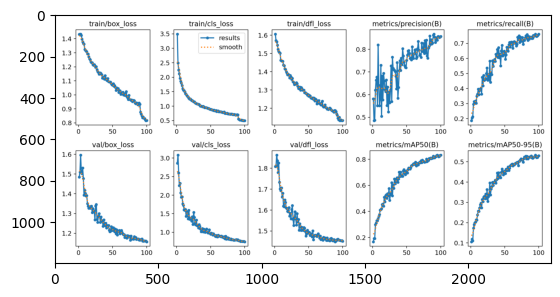

In [6]:
img = mpimg.imread('/kaggle/working/runs/detect/train/results.png')
imgplot = plt.imshow(img)
plt.show()

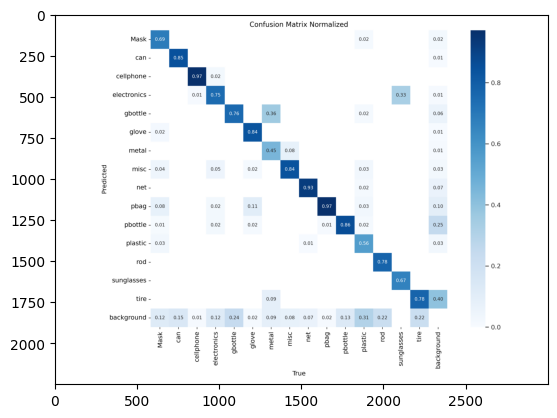

In [7]:
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png')
imgplot = plt.imshow(img)
plt.show()

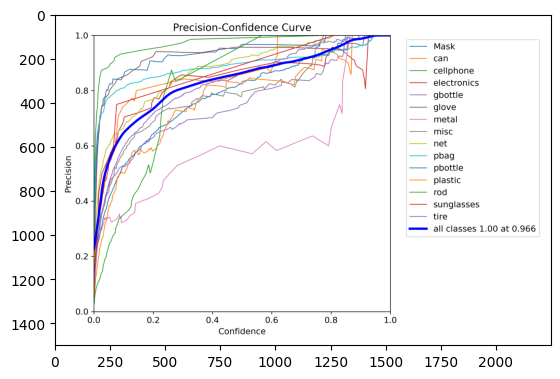

In [8]:
img = mpimg.imread('/kaggle/working/runs/detect/train/P_curve.png')
imgplot = plt.imshow(img)
plt.show()

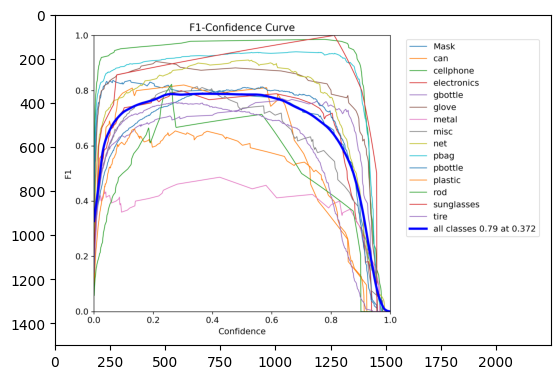

In [9]:
img = mpimg.imread('/kaggle/working/runs/detect/train/F1_curve.png')
imgplot = plt.imshow(img)
plt.show()

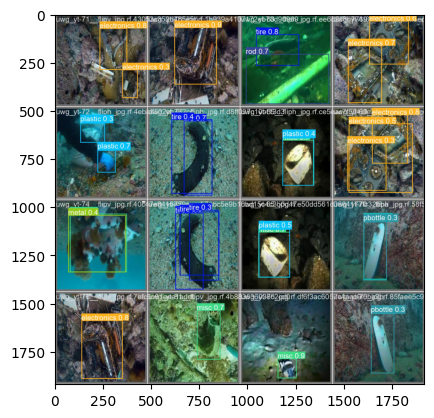

In [10]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch0_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" device=0 source="/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images" save=True

In [12]:
from glob import glob
from PIL import Image

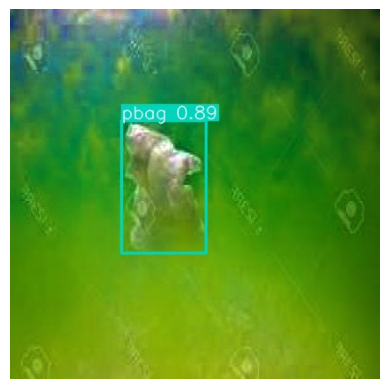

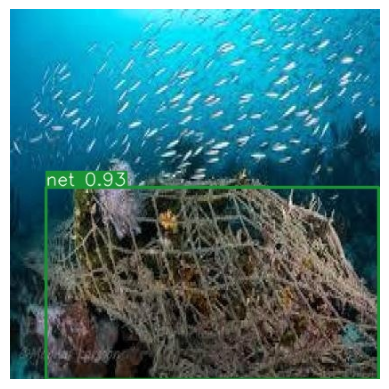

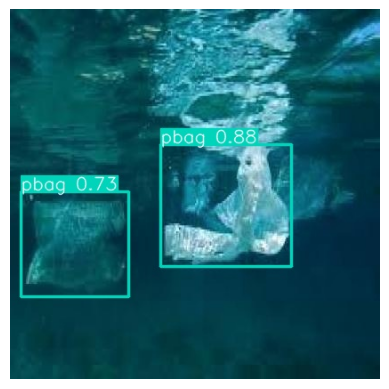

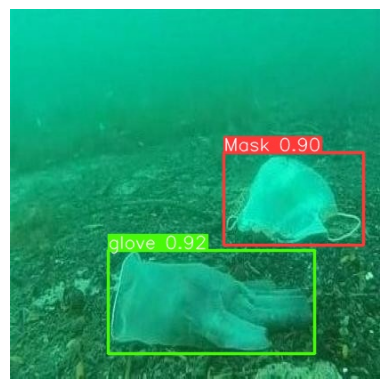

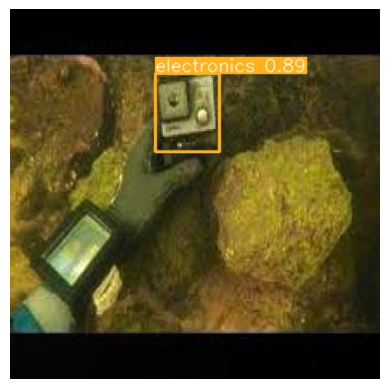

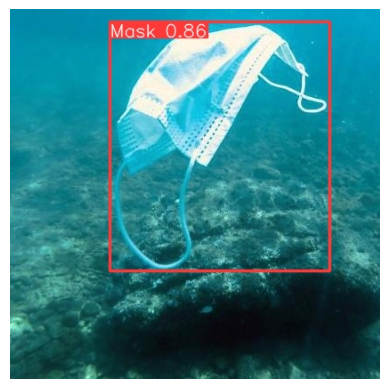

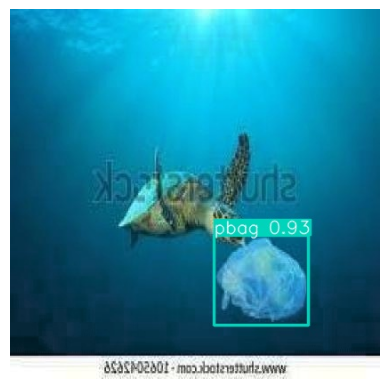

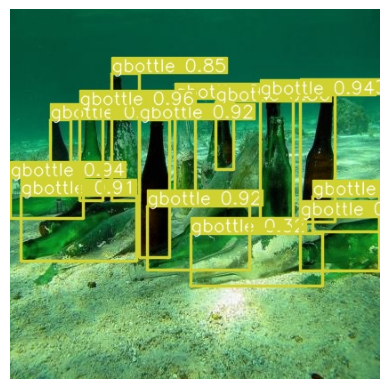

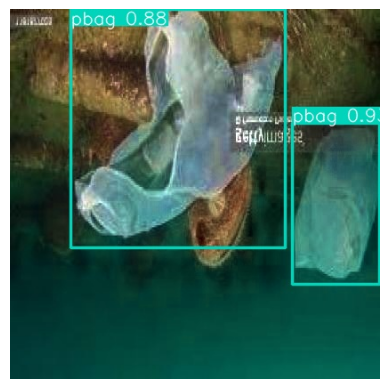

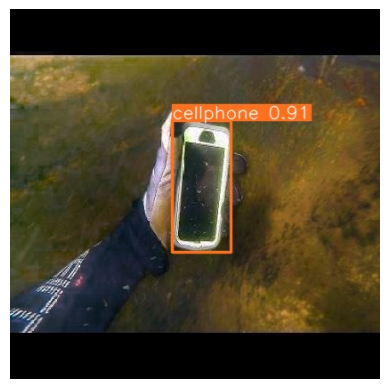

In [15]:
img_path = glob('/kaggle/working/runs/detect/predict/*.jpg')
img_path = np.random.choice(img_path, 10)

for image_path in img_path:
    plt.imshow(Image.open(image_path))
    plt.axis("off")
    plt.show()
    print("\n")